In [1]:
# Call Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#create variable for dataset
df=pd.read_csv('Ecommerce Customers.csv')

In [3]:
df.shape

(500, 8)

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
# Check Null Values
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
#separate numerical data
numdf=df.select_dtypes('float64')

Avg. Session Length
min= 29.532428967057943
lower Whisker= 30.286577475362726
max= 36.13966248879052
upper Whisker= 35.76722955310954


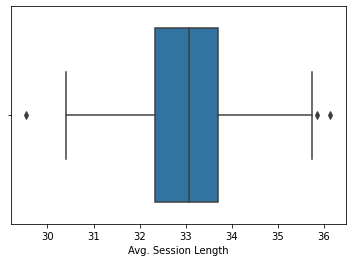


Time on App
min= 8.508152176032603
lower Whisker= 9.339608825131295
max= 15.126994288792467
upper Whisker= 14.802394229583685


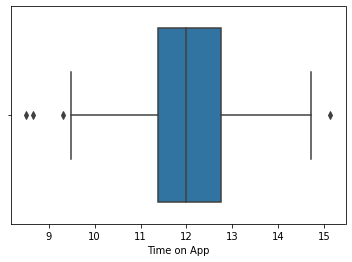


Time on Website
min= 33.91384724758464
lower Whisker= 34.29849491039147
max= 40.005181638101895
upper Whisker= 39.76719469493466


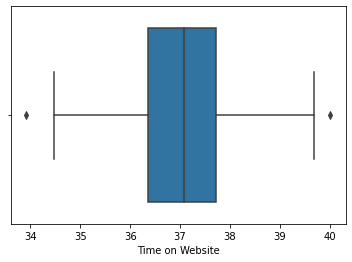


Length of Membership
min= 0.2699010899842742
lower Whisker= 1.1363713579559565
max= 6.922689335035808
upper Whisker= 5.9205802963707175


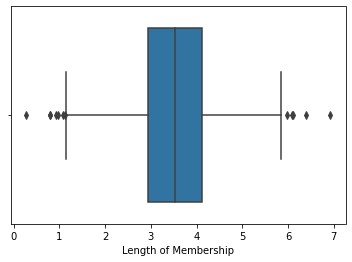


Yearly Amount Spent
min= 256.67058229005585
lower Whisker= 288.6249512402365
max= 765.5184619388373
upper Whisker= 705.7271533863172


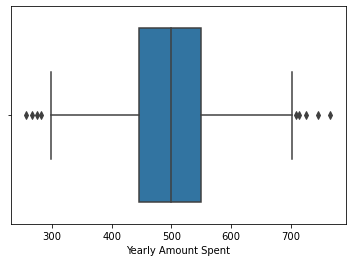

In [8]:
# check outliers 
for i in numdf:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    print(i)
    print('min=',df[i].min())
    print('lower Whisker=',lower)
    print('max=',df[i].max())
    print('upper Whisker=',upper)
    plt.figure()
    sns.boxplot(data=df,x=i)
    plt.show()
    print()

In [9]:
# as per above analysis
#Avg. Session Length
x=list(df[df['Avg. Session Length']<30.286577475362726].index)
df=df.drop(x)
x=list(df[df['Avg. Session Length']>35.76722955310954].index)
df=df.drop(x)

In [10]:
#Time on App
x=list(df[df['Time on App']<9.339608825131295].index)
df=df.drop(x)
x=list(df[df['Time on App']>14.802394229583685].index)
df=df.drop(x)

In [11]:
#Time on Website
x=list(df[df['Time on Website']<34.29849491039147].index)
df=df.drop(x)
x=list(df[df['Time on Website']>39.76719469493466].index)
df=df.drop(x)

In [12]:
#Length of Membership
x=list(df[df['Length of Membership']<1.1363713579559565].index)
df=df.drop(x)
x=list(df[df['Length of Membership']>5.9205802963707175].index)
df=df.drop(x)

In [13]:
#Yearly Amount Spent
x=list(df[df['Yearly Amount Spent']<288.6249512402365].index)
df=df.drop(x)
x=list(df[df['Yearly Amount Spent']>705.7271533863172].index)
df=df.drop(x)

In [14]:
# Now check skewness
from scipy.stats import skew
for i in numdf:
    print(i)
    print(skew(df[i]))
    print()
    

Avg. Session Length
-0.025018184867800608

Time on App
0.018282934793267525

Time on Website
0.021140169500289917

Length of Membership
-0.10288438894993861

Yearly Amount Spent
0.07093076672787307



In [15]:
# There are no more skewness
# Then separate categorical and numerical features
catdf=df.select_dtypes('object')
numdf=df.select_dtypes('float64')

In [16]:
# Do Label Encoding to categorical Data
from sklearn.preprocessing import LabelEncoder
for i in catdf:
    le=LabelEncoder()
    catdf[i]=le.fit_transform(catdf[i])

In [17]:
# Concat categorical and numerical data into new variable
newdf=pd.concat([catdf,numdf],axis=1)
newdf.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,325,366,132,34.497268,12.655651,39.577668,4.082621,587.951054
1,180,216,25,31.926272,11.109461,37.268959,2.664034,392.204933
2,337,116,6,33.000915,11.330278,37.110597,4.104543,487.547505
3,372,58,114,34.305557,13.717514,36.721283,3.120179,581.852344
4,324,56,80,33.330673,12.795189,37.536653,4.446308,599.406092


In [18]:
# Do Standard Scaling to data
from sklearn.preprocessing import StandardScaler
for i in newdf:
    ss=StandardScaler()
    newdf[i]=ss.fit_transform(newdf[[i]])

In [19]:
# Check correlation coefficient
newdf.corr()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Email,1.000000,-0.000718,0.069048,-0.050985,0.060733,-0.034180,0.058354,0.062284
Address,-0.000718,1.000000,0.044034,0.039630,0.004484,0.067951,-0.114030,-0.073697
Avatar,0.069048,0.044034,1.000000,0.038403,-0.009655,0.006842,0.027548,0.034420
Avg. Session Length,-0.050985,0.039630,0.038403,1.000000,-0.038177,-0.004834,0.013809,0.339804
Time on App,0.060733,0.004484,-0.009655,-0.038177,1.000000,0.065210,-0.054382,0.475560
Time on Website,-0.034180,0.067951,0.006842,-0.004834,0.065210,1.000000,-0.046572,0.000581
Length of Membership,0.058354,-0.114030,0.027548,0.013809,-0.054382,-0.046572,1.000000,0.767651
Yearly Amount Spent,0.062284,-0.073697,0.034420,0.339804,0.475560,0.000581,0.767651,1.000000


In [20]:
#As per above analysis important features are - 'Avg. Session Length','Time on App','Length of Membership'

In [21]:
# then take X and Y as Important Independant features and Dependant Features respectively
X=newdf[['Avg. Session Length','Time on App','Length of Membership']]
Y=newdf['Yearly Amount Spent']

In [22]:
# Split the train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

# Apply Linear Regression

In [23]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_predict=lr.predict(X_test)
print('Train Score=',lr.score(X_train,Y_train))
print('Test Score=',lr.score(X_test,Y_test))

Train Score= 0.9785452898540035
Test Score= 0.9811179246213177


In [24]:
from sklearn.metrics import mean_squared_error,r2_score

residual1=Y_test-Y_predict

residual=residual1.mean()
print("Mean of Residual=",residual)

mse=mean_squared_error(Y_test,Y_predict)

rmse=np.sqrt(mse)

r2s=r2_score(Y_test,Y_predict)

print('MSE=',mse)
print('RMSE=',rmse)
print('r2_score=',r2s)

Mean of Residual= 0.00657554905374544
MSE= 0.020394412060129305
RMSE= 0.14280900552881567
r2_score= 0.9811179246213177


In [25]:
'''
Conclusion:
            Train Score= 0.9785452898540035
            Test Score= 0.9811179246213177
'''

'\nConclusion:\n            Train Score= 0.9785452898540035\n            Test Score= 0.9811179246213177\n'